In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/incidence-PAY-7.csv", skiprows=1)

In [2]:
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202015          7   1931      682    3180       3           1   
1     202014          7   3879     2227    5531       6           3   
2     202013          7   7326     5236    9416      11           8   
3     202012          7   8123     5790   10456      12           8   
4     202011          7  10198     7568   12828      15          11   
5     202010          7   9011     6691   11331      14          10   
6     202009          7  13631    10544   16718      21          16   
7     202008          7  10424     7708   13140      16          12   
8     202007          7   8959     6574   11344      14          10   
9     202006          7   9264     6925   11603      14          10   
10    202005          7   8505     6314   10696      13          10   
11    202004          7   7991     5831   10151      12           9   
12    202003          7   5968     4100    7836       9           6   
13    202002          7   6534     4530    8538      10           7   
14    202001          7   9835     7019   12651      15          11   
15    201952          7   7941     5246   10636      12           8   
16    201951          7   5823     3675    7971       9           6   
17    201950          7   6424     4276    8572      10           7   
18    201949          7   6621     4540    8702      10           7   
19    201948          7   5542     3383    7701       8           5   
20    201947          7   7536     5058   10014      11           7   
21    201946          7   2638     1316    3960       4           2   
22    201945          7   4492     2615    6369       7           4   
23    201944          7   5728     3627    7829       9           6   
24    201943          7   4834     2751    6917       7           4   
25    201942          7   6279     3989    8569      10           7   
26    201941          7   4130     2030    6230       6           3   
27    201940          7   4211     2218    6204       6           3   
28    201939          7   3137     1310    4964       5           2   
29    201938          7   3078     1416    4740       5           2   
...      ...        ...    ...      ...     ...     ...         ...   
1502  199126          7  17608    11304   23912      31          20   
1503  199125          7  16169    10700   21638      28          18   
1504  199124          7  16171    10071   22271      28          17   
1505  199123          7  11947     7671   16223      21          13   
1506  199122          7  15452     9953   20951      27          17   
1507  199121          7  14903     8975   20831      26          16   
1508  199120          7  19053    12742   25364      34          23   
1509  199119          7  16739    11246   22232      29          19   
1510  199118          7  21385    13882   28888      38          25   
1511  199117          7  13462     8877   18047      24          16   
1512  199116          7  14857    10068   19646      26          18   
1513  199115          7  13975     9781   18169      25          18   
1514  199114          7  12265     7684   16846      22          14   
1515  199113          7   9567     6041   13093      17          11   
1516  199112          7  10864     7331   14397      19          13   
1517  199111          7  15574    11184   19964      27          19   
1518  199110          7  16643    11372   21914      29          20   
1519  199109          7  13741     8780   18702      24          15   
1520  199108          7  13289     8813   17765      23          15   
1521  199107          7  12337     8077   16597      22          15   
1522  199106          7  10877     7013   14741      19          12   
1523  199105          7  10442     6544   14340      18          11   
1524  199104          7   7913     4563   11263      14           8   
1525  199103          7  15387    10484   20290      27          18   
1526  199102          7  16277  

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [4]:
def convert_week(date):
    date_str=str(date)
    year=int(date_str[:4])
    week=int(date_str[4:])
    w=isoweek.Week(year,week)
    return pd.Period(w.day(0),'W')
    

In [5]:
raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [6]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2019-09-16/2019-09-22  201938          7   3078     1416    4740       5   
2019-09-23/2019-09-29  201939          7   3137     1310    4964       5   
2019-09-30/2019-10-06  201940          7   4211     2218    6204       6   
2019-10-07/2019-10-13  201941          7   4130     2030    6230       6   
2019-10-14/2019-10-20  201942          7   6279     3989    8569      10   
2019-10-21/2019-10-27  201943          7   4834     2751    6917       7   
2019-10-28/2019-11-03  201944          7   5728     3627    7829       9   
2019-11-04/2019-11-10  201945          7   4492     2615    6369       7   
2019-11-11/2019-11-17  201946          7   2638     1316    3960       4   
2019-11-18/2019-11-24  201947          7   7536     5058   10014      11   
2019-11-25/2019-12-01  201948          7   5542     3383    7701       8   
2019-12-02/2019-12-08  201949          7   6621     4540    8702      10   
2019-12-09/2019-12-15  201950          7   6424     4276    8572      10   
2019-12-16/2019-12-22  201951          7   5823     3675    7971       9   
2019-12-23/2019-12-29  201952          7   7941     5246   10636      12   
2019-12-30/2020-01-05  202001          7   9835     7019   12651      15   
2020-01-06/2020-01-12  202002          7   6534     4530    8538      10   
2020-01-13/2020-01-19  202003          7   5968     4100    7836       9   
2020-01-20/2020-01-26  202004          7   7991     5831   10151      12   
2020-01-27/2020-02-02  202005          7   8505     6314   10696      13 

On cherche si nos données se suivent ou s'il y a des trous dans les dates:

In [7]:
periods = sorted_data.index
for p1,p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp()-p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1,p2)

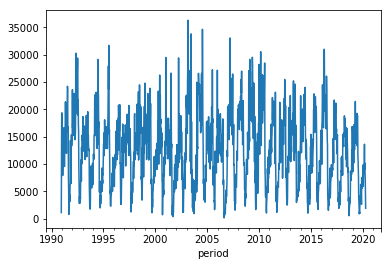

In [8]:
sorted_data['inc'].plot()

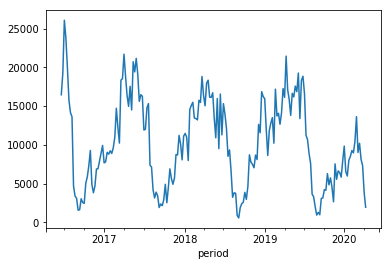

In [9]:
sorted_data['inc'][-200:].plot()

In [10]:
first_september_weeks=[pd.Period(pd.Timestamp(y,9,1),'W') for y in range(sorted_data.index[0].year, sorted_data.index[-1].year)]

In [11]:
first_september_weeks # semaines contenant le 1er septembre. 

[Period('1990-08-27/1990-09-02', 'W-SUN'),
 Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('20

In [12]:
year=[]
yearly_incidence = []
for week1, week2 in zip(first_september_weeks[:-1], first_september_weeks[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year))-52 < 2   # s'il n'y a pas le bon nombre de semaines dans l'année -> erreur
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

In [13]:
yearly_incidence = pd.Series(index=year, data=yearly_incidence)

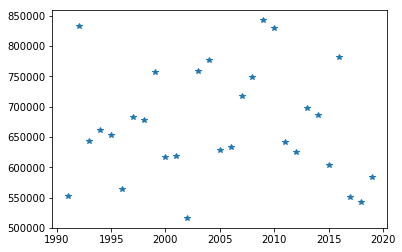

In [14]:
yearly_incidence.plot(style='*')

In [15]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Année avec la plus forte incidence: 2009; la plus faible : 2002